In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df=pd.read_csv("C:/Users/Samarth Thakur/Downloads/hour (1).csv")
df

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
df.shape

(17379, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df.isnull().any()#checking any null values

index         False
date          False
season        False
year          False
month         False
hour          False
holiday       False
weekday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
demand        False
dtype: bool

In [7]:
#now we have to drop certain column for better accuracy of our model
bikes_df=df.copy()
bikes_df=bikes_df.drop(['index','date','casual','registered'] , axis=1)


In [8]:
bikes_df.shape

(17379, 13)

here you can see our column reduces from 17 to 13

In [9]:
bikes_df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


# Visualize the data

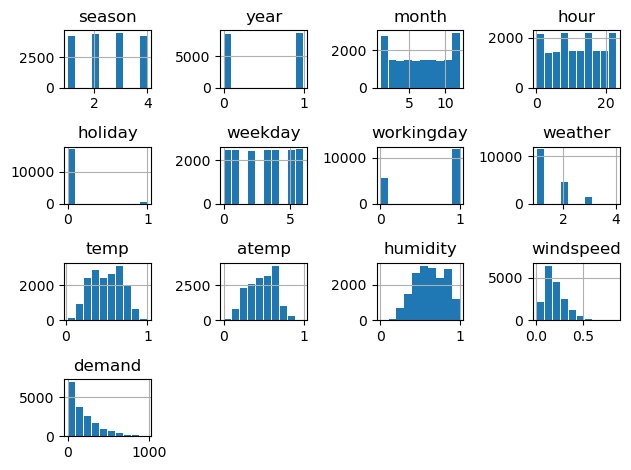

In [10]:
import matplotlib.pyplot as plt
bikes_df.hist(rwidth=0.9)
plt.tight_layout()

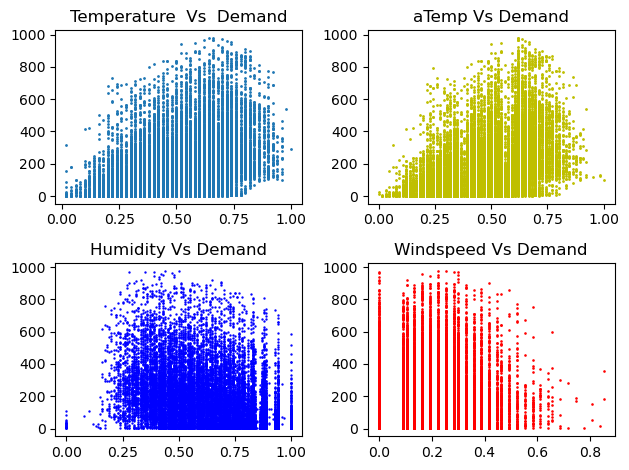

In [11]:
plt.subplot(2,2,1)
plt.title('Temperature  Vs  Demand')
plt.scatter(bikes_df['temp'],bikes_df['demand'],s=1)

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_df['atemp'],bikes_df['demand'],s=1,c='y')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_df['humidity'],bikes_df['demand'],s=0.5,c='b')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_df['windspeed'],bikes_df['demand'],s=0.77,c='r')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

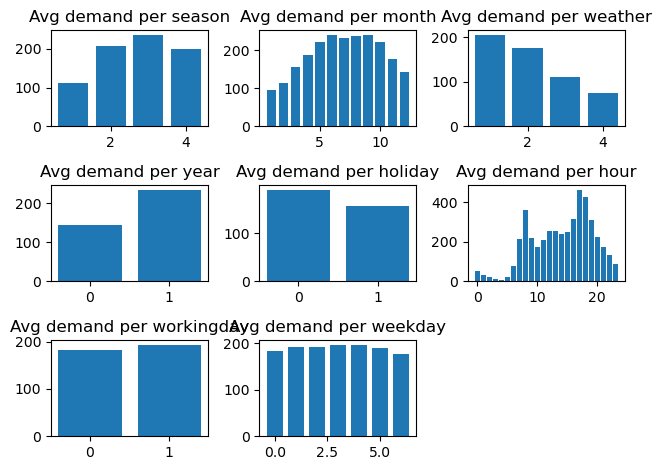

In [12]:
#plot categoricalfeatures vs demand
plt.subplot(3,3,1)
plt.title("Avg demand per season")
#create a list of unique season's values
cat_list=bikes_df['season'].unique()
#create avg demand per season using groupby
cat_avg = bikes_df.groupby('season')['demand'].mean()
plt.bar(cat_list,cat_avg)



plt.subplot(3,3,2)
plt.title("Avg demand per month")
cat_list=bikes_df['month'].unique()
cat_avg = bikes_df.groupby('month')['demand'].mean()
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,3)
plt.title("Avg demand per weather")
cat_list=bikes_df['weather'].unique()
cat_avg = bikes_df.groupby('weather')['demand'].mean()
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,4)
plt.title("Avg demand per year")
cat_list=bikes_df['year'].unique()
cat_avg = bikes_df.groupby('year')['demand'].mean()
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,5)
plt.title("Avg demand per holiday")
cat_list=bikes_df['holiday'].unique()
cat_avg = bikes_df.groupby('holiday')['demand'].mean()
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,6)
plt.title("Avg demand per hour")
cat_list=bikes_df['hour'].unique()
cat_avg = bikes_df.groupby('hour')['demand'].mean()
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,7 )
plt.title("Avg demand per workingday")
cat_list=bikes_df['workingday'].unique()
cat_avg = bikes_df.groupby('workingday')['demand'].mean()
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,8 )
plt.title("Avg demand per weekday")
cat_list=bikes_df['weekday'].unique()
cat_avg = bikes_df.groupby('weekday')['demand'].mean()
plt.bar(cat_list,cat_avg)

plt.tight_layout()
plt.show




now we drop some feature like
-weekday because it hardly shows any variation
-year because it is of only 2 years and we dont know 5 years down the lane
-workingday same it does not show any change

<BarContainer object of 24 artists>

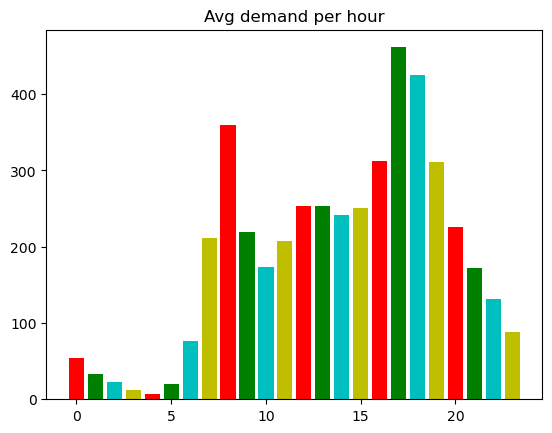

In [13]:
plt.title("Avg demand per hour")
cat_list=bikes_df['hour'].unique()
cat_avg = bikes_df.groupby('hour')['demand'].mean()
plt.bar(cat_list,cat_avg,color=['r','g','c','y',])

In [14]:
#checking outliers
bikes_df['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

here you can see min is 1 max is 977 and 50% that is fifty percent of data is fairly away from max and mean now we can check at different quantile

In [15]:
bikes_df['demand'].quantile([0.05,0.10,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

from above we can say that 5% of time the demand is less than or equal to 5
similary only 1% of time it is greater than or equal to 782 so these two are outliers

## Check the multiple linear regression assumption

In [16]:
#linearity using correlation matrix
correl=bikes_df[['temp','atemp','humidity','windspeed','demand']].corr()
print(correl)

               temp     atemp  humidity  windspeed    demand
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
humidity  -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
demand     0.404772  0.400929 -0.322911   0.093234  1.000000


Multicollinearity is a term used in statistics and regression analysis to describe a situation in which two or more independent variables (also known as predictor variables or features) in a regression model are highly correlated with each other.

Multicollinearity occurs when there is a high correlation between two or more independent variables. This high correlation can make it difficult to determine the individual effect of each independent variable on the dependent variable in a regression model.

    
Effects on Regression Analysis: Multicollinearity can have several adverse effects on regression analysis, including:

    It can make it challenging to identify the true relationship between         independent variables and the dependent variable.
    
    If multicollinearity is detected, there are several strategies to address it:

Removing one or more of the highly correlated independent variables.
Combining correlated variables into a single variable.

In [17]:
#we drop some  feature from above all cell findings
bikes_df=bikes_df.drop(['weekday','year','workingday','atemp','windspeed'],axis=1)

In [18]:
bikes_df.shape

(17379, 8)

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x28bb5c3eb80>)

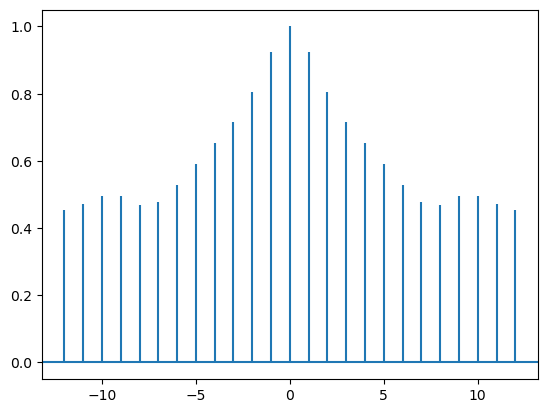

In [19]:
bikes_df1=pd.to_numeric(bikes_df['demand'],downcast='float')
plt.acorr(bikes_df1,maxlags=12)

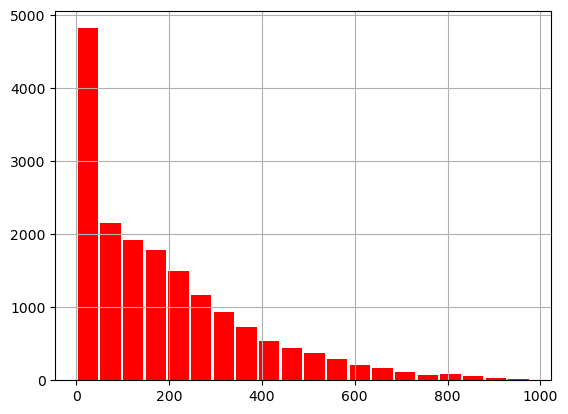

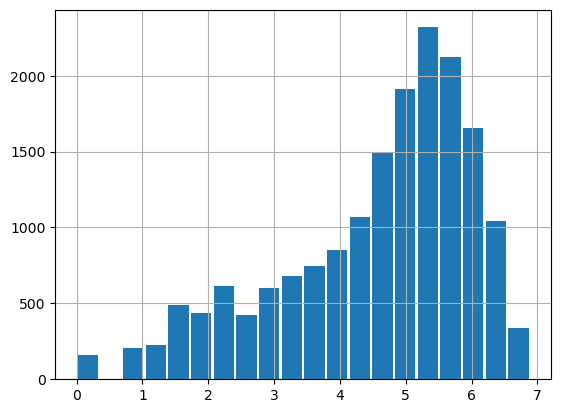

In [20]:
df1=bikes_df['demand']
df2=np.log(df1)

plt.figure()
df1.hist(rwidth=0.9,bins=20,color='r')

plt.figure()
df2.hist(rwidth=0.9,bins=20)

bikes_df['demand']=np.log(bikes_df['demand'])

The normality assumption in regression, specifically in linear regression analysis, is one of the key assumptions that should hold for the model to be valid. This assumption pertains to the distribution of the residuals (the differences between the observed values and the predicted values) and is often referred to as the "normality of residuals" or the "normality of errors."

The normality assumption states that the residuals or errors should be normally distributed, which means they should follow a normal or Gaussian distribution. In a normal distribution:

 ->   The data is symmetrically distributed around the mean.
 -> The majority of the data points cluster around the mean.

In [21]:
print(bikes_df)

       season  month  hour  holiday  weather  temp  humidity    demand
0           1      1     0        0        1  0.24      0.81  2.772589
1           1      1     1        0        1  0.22      0.80  3.688879
2           1      1     2        0        1  0.22      0.80  3.465736
3           1      1     3        0        1  0.24      0.75  2.564949
4           1      1     4        0        1  0.24      0.75  0.000000
...       ...    ...   ...      ...      ...   ...       ...       ...
17374       1     12    19        0        2  0.26      0.60  4.779123
17375       1     12    20        0        2  0.26      0.60  4.488636
17376       1     12    21        0        1  0.26      0.60  4.499810
17377       1     12    22        0        1  0.26      0.56  4.110874
17378       1     12    23        0        1  0.26      0.65  3.891820

[17379 rows x 8 columns]


In [22]:
t_1=bikes_df['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

t_2=bikes_df['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

t_3=bikes_df['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

bikes_df_lag=pd.concat([bikes_df,t_1,t_2,t_3],axis=1)
#3 more columns added

print(bikes_df_lag)

       season  month  hour  holiday  weather  temp  humidity    demand  \
0           1      1     0        0        1  0.24      0.81  2.772589   
1           1      1     1        0        1  0.22      0.80  3.688879   
2           1      1     2        0        1  0.22      0.80  3.465736   
3           1      1     3        0        1  0.24      0.75  2.564949   
4           1      1     4        0        1  0.24      0.75  0.000000   
...       ...    ...   ...      ...      ...   ...       ...       ...   
17374       1     12    19        0        2  0.26      0.60  4.779123   
17375       1     12    20        0        2  0.26      0.60  4.488636   
17376       1     12    21        0        1  0.26      0.60  4.499810   
17377       1     12    22        0        1  0.26      0.56  4.110874   
17378       1     12    23        0        1  0.26      0.65  3.891820   

            t-1       t-2       t-3  
0           NaN       NaN       NaN  
1      2.772589       NaN       NaN

In [23]:
bikes_df_lag=bikes_df_lag.dropna()
bikes_df_lag #null values drop


,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [24]:
bikes_df_lag.dtypes



season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

we have to convert int to categorical for dummy variable 

In [25]:
# Assuming you have a DataFrame named 'bikes_df_lag'

# Convert categorical variables to the 'category' data type
bikes_df_lag['season'] = bikes_df_lag['season'].astype('category')
bikes_df_lag['holiday'] = bikes_df_lag['holiday'].astype('category')
bikes_df_lag['weather'] = bikes_df_lag['weather'].astype('category')
bikes_df_lag['month'] = bikes_df_lag['month'].astype('category')
bikes_df_lag['hour'] = bikes_df_lag['hour'].astype('category')

# Perform one-hot encoding using get_dummies and drop the first category (to avoid multicollinearity)
bikes_df_lag = pd.get_dummies(bikes_df_lag, drop_first=True) 

bikes_df_lag=pd.get_dummies(bikes_df_lag,drop_first=True)
bikes_df_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Train & Test (Model Training)

most important our data is time series data so we have to be careful so they that it doesn't loose autocollinerity

In [26]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test=\
#     train_test_split(X,Y,test_size=0.4,random_state=1234)

In [27]:
Y=bikes_df_lag[['demand']]
X=bikes_df_lag.drop(['demand'],axis=1)

In [28]:
#create the size for 70% of the data
tr_size=0.7*len(X) 
tr_size=int(tr_size)

#create the train and test using the tr_size
X_train=X.values[0:tr_size]
X_test=X.values[tr_size:len(X)]

Y_train=Y.values[0:tr_size]
Y_test=Y.values[tr_size:len(Y)]

## Fit and Score the model

In [29]:
#Linear Regression
from sklearn.linear_model import LinearRegression

std_reg=LinearRegression()
std_reg.fit(X_train,Y_train)

r2_train=std_reg.score(X_train,Y_train)
r2_test=std_reg.score(X_test,Y_test)

Y_predict=std_reg.predict(X_test)

In [36]:
model=std_reg.coef_
print(model)

[[ 0.71080316 -0.0559322   0.85743079  0.00611777 -0.2302049   0.08818878
   0.12289885  0.18198974  0.03223414  0.0280066   0.0147914   0.04097767
  -0.08766006 -0.16577191 -0.14604356 -0.08284003 -0.06724419 -0.08480538
  -0.06064348 -0.17676321 -0.25478093 -0.5247821  -0.52597868  0.79069642
   0.95976031  0.79431355  0.85311622  0.25010064  0.39046758  0.939675
   0.94603705  0.68848682  0.64026306  0.80199342  1.00325582  1.16867589
   0.76355682  0.60025684  0.64316335  0.64683902  0.55366271  0.27028213
  -0.07077788 -0.04022527 -0.26520369  0.06028938]]


In [ ]:
Y_predict

In [ ]:
print(Y_test)

In [ ]:
print(Y_train)

In [ ]:
from sklearn.metrics import mean_squared_error 

rmse=math.sqrt(mean_squared_error(Y_test,Y_predict))

print(rmse)


In [ ]:
# Assuming Y_test and Y_predict are NumPy arrays
Y_test = Y_test.reshape(-1)  # Ensure 1-dimensional
Y_predict = Y_predict.reshape(-1)

# Convert the true and predicted target values from log-scale to original scale
Y_test_e = [math.exp(val) for val in Y_test]
Y_predict_e = [math.exp(val) for val in Y_predict]

# Initialize a variable to store the sum of squared logarithmic differences
log_sq_sum = 0

# Calculate the squared logarithmic differences for each data point and sum them
for i in range(len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)  # Adding 1 to avoid logarithm of zero
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a) ** 2
    log_sq_sum += log_diff

# Calculate the RMSLE
rmsle = math.sqrt(log_sq_sum / len(Y_test))
print(rmsle)